In [ ]:
pip install torch torchvision


In [ ]:
!pip install seaborn

In [ ]:
pip install tqdm

# Installing packages

In [ ]:
import numpy as np
from sklearn import datasets
from torchvision.datasets import CIFAR100
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR100
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from torch.nn import Sequential
from sklearn.metrics import confusion_matrix
import numpy as np
from collections import defaultdict
import copy
import numpy as np
import pandas as pd
from tqdm import tqdm
from torch.utils.data import DataLoader, random_split
import torch.nn as nn
import torch.optim as optim
import torch.optim as optim
from torch.optim.lr_scheduler import MultiStepLR
from torchvision import datasets, transforms
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import MultiStepLR
from torchvision.datasets import CIFAR100
from torchvision.transforms import ToTensor, Normalize
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

In [ ]:
torch.manual_seed(42)


# Selecting device

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Reading the Air Passengers dataset

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

data=pd.read_csv("/content/AirPassengers.csv")
d=pd.read_csv("/content/AirPassengers.csv")
data.head()



,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


# Pre-Processing

In [ ]:
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)


In [ ]:
d['Month'] = pd.to_datetime(d['Month'])
d.set_index('Month', inplace=True)

### Fill empty entries with last non null value

In [ ]:
data.fillna(method='ffill', inplace=True)

# Data Visualization

## Box Plot

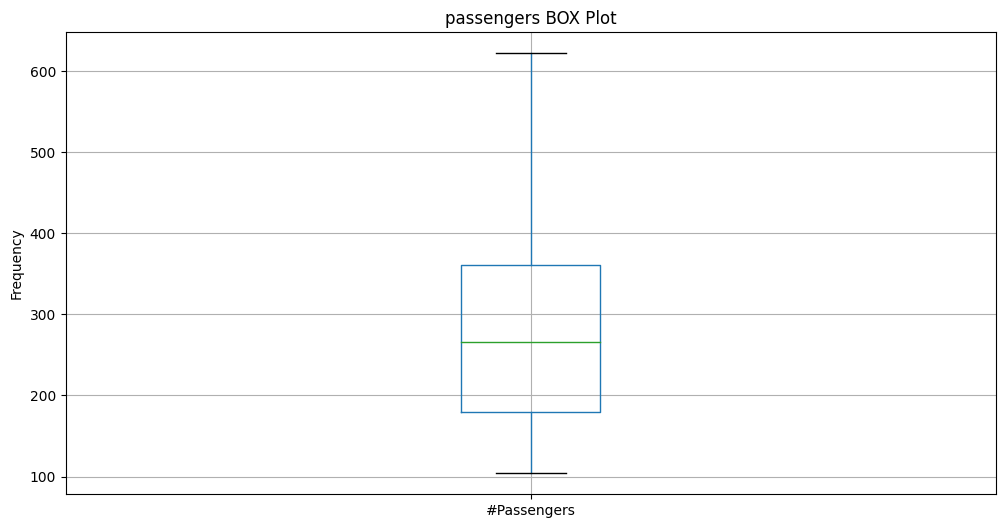

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
data.boxplot(column='#Passengers')
plt.title('passengers BOX Plot')

plt.ylabel('Frequency')
plt.grid(True)
plt.show()


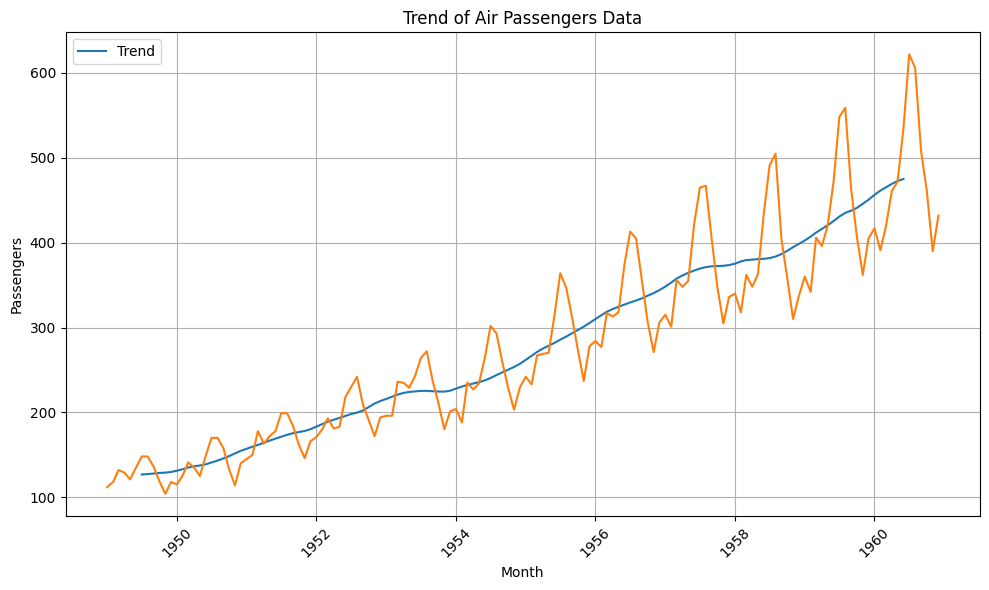

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data["#Passengers"], model='additive', period=12)
trend = decomposition.trend

plt.figure(figsize=(10, 6))
plt.plot(data.index, trend, label='Trend')
plt.plot(data.index, data["#Passengers"])
plt.title('Trend of Air Passengers Data')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## ViolinPlot

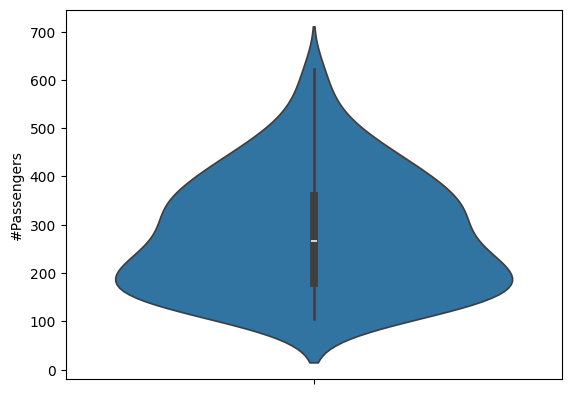

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.violinplot(data=data, y="#Passengers")

plt.show()



# Finding Quarterly and annual data

In [ ]:
data_q = d.resample("Q").sum()
data_a = d.resample("A").sum()
print("Monthly Data:")
print(d)
print("\nQly Data:")
print(data_q)
print("\nAnnual Data:")
print(data_a)

Monthly Data:
            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121
...                 ...
1960-08-01          606
1960-09-01          508
1960-10-01          461
1960-11-01          390
1960-12-01          432

[144 rows x 1 columns]

Quarterly Data:
            #Passengers
Month                  
1949-03-31          362
1949-06-30          385
1949-09-30          432
1949-12-31          341
1950-03-31          382
1950-06-30          409
1950-09-30          498
1950-12-31          387
1951-03-31          473
1951-06-30          513
1951-09-30          582
1951-12-31          474
1952-03-31          544
1952-06-30          582
1952-09-30          681
1952-12-31          557
1953-03-31          628
1953-06-30          707
1953-09-30          773
1953-12-31          592
1954-03-31          627
1954-06-30          725
1954-09-30          854
1954-12-31          661
1955-03-3

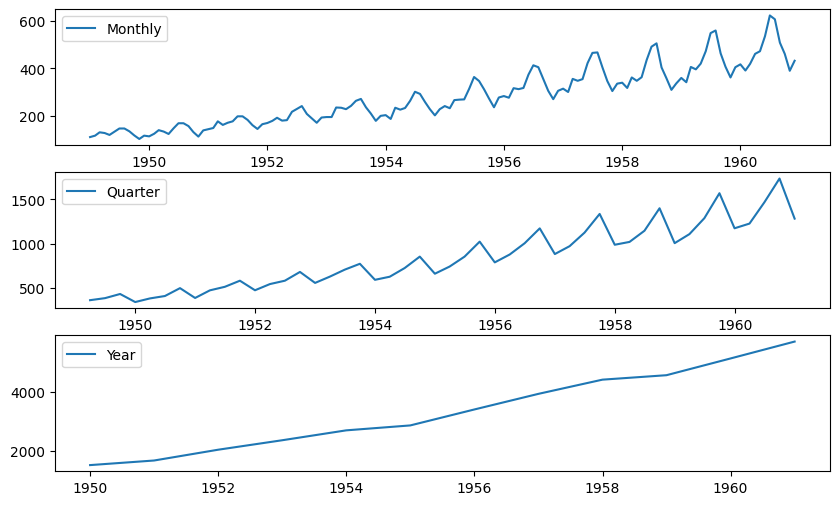

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(10, 6))

ax[0].plot(d, label="Monthly")
ax[0].legend(loc=0)

ax[1].plot(data_q, label="Quarter")
ax[1].legend(loc=0)

ax[2].plot(data_a, label="Year")
ax[2].legend(loc=0)

plt.show()

## Plotting seasonal decomposition

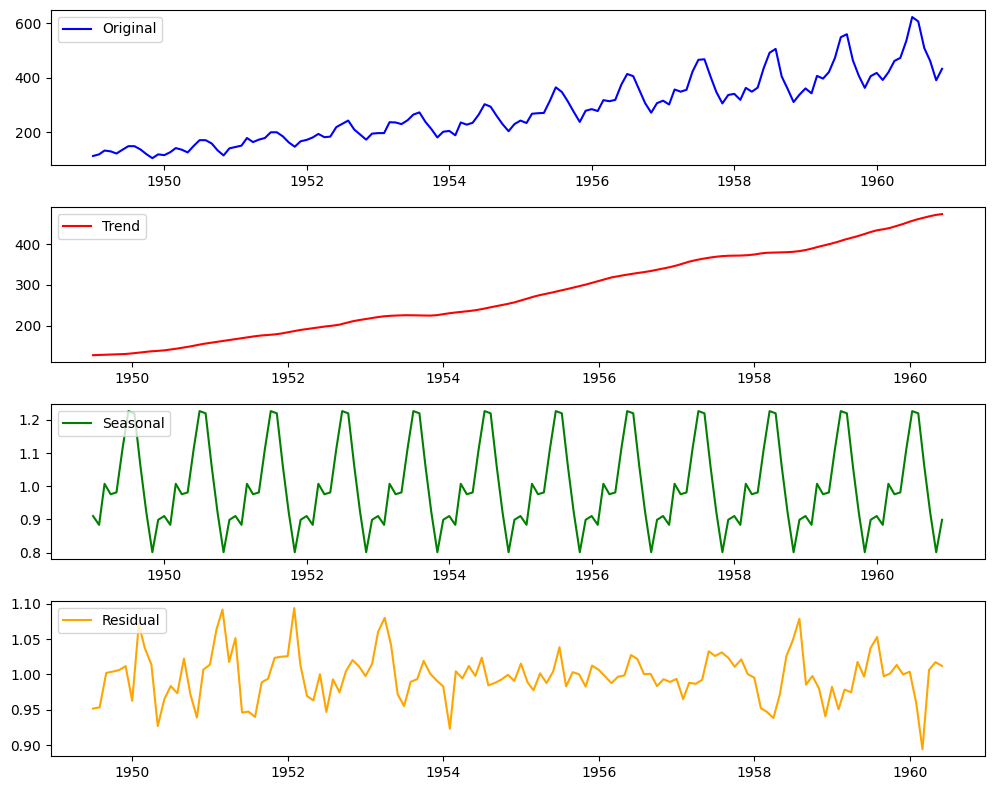

In [ ]:
decomposition = seasonal_decompose(data, model='multiplicative')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(data, label='Original', color='blue')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(trend, label='Trend', color='red')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(residual, label='Residual', color='orange')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Creating relevant features

In [ ]:
d["Months"] = d.index.month
d["Years"] = d.index.year
d

,#Passengers,Months,Years
Month,,,
1949-01-01,112,1,1949
1949-02-01,118,2,1949
1949-03-01,132,3,1949
1949-04-01,129,4,1949
1949-05-01,121,5,1949
...,...,...,...
1960-08-01,606,8,1960
1960-09-01,508,9,1960
1960-10-01,461,10,1960


# Heatmap

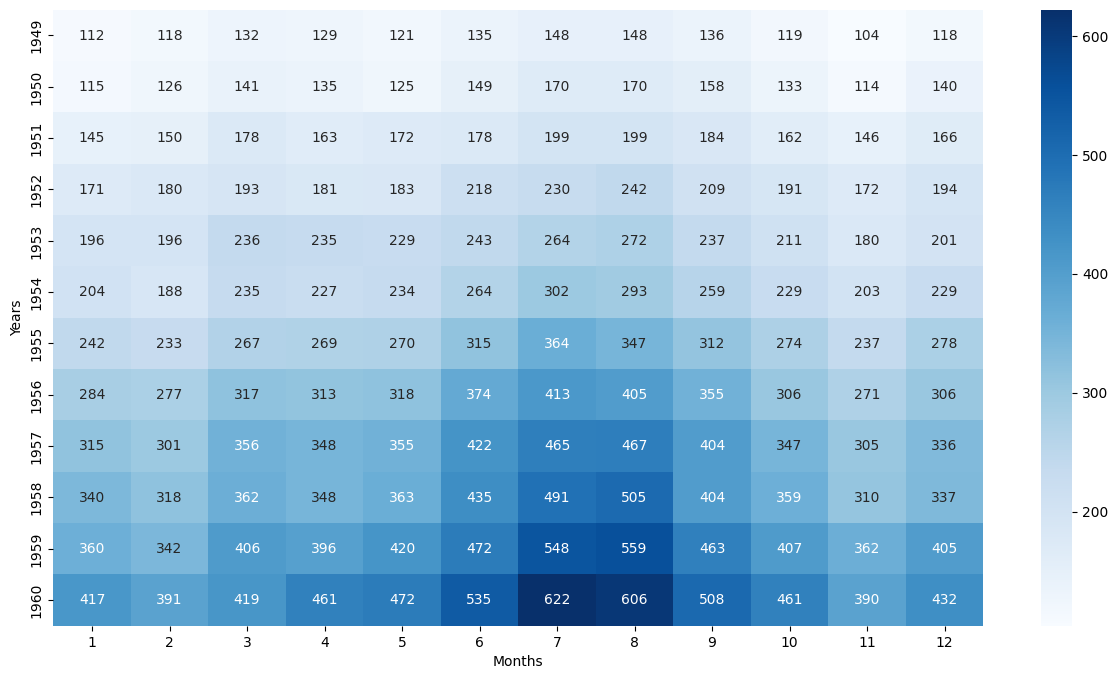

In [ ]:
plt.figure(figsize=(15,8))
matrix = pd.pivot_table(d, values="#Passengers", index="Years", columns="Months")
colors = sns.color_palette("Blues", as_cmap=True)
sns.heatmap(matrix, annot=True, fmt="g", cmap=colors)
plt.show()

# Taking passenger data

In [ ]:
data=data["#Passengers"]
data=np.array(data).reshape(-1,1)
data

array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119],
       [104],
       [118],
       [115],
       [126],
       [141],
       [135],
       [125],
       [149],
       [170],
       [170],
       [158],
       [133],
       [114],
       [140],
       [145],
       [150],
       [178],
       [163],
       [172],
       [178],
       [199],
       [199],
       [184],
       [162],
       [146],
       [166],
       [171],
       [180],
       [193],
       [181],
       [183],
       [218],
       [230],
       [242],
       [209],
       [191],
       [172],
       [194],
       [196],
       [196],
       [236],
       [235],
       [229],
       [243],
       [264],
       [272],
       [237],
       [211],
       [180],
       [201],
       [204],
       [188],
       [235],
       [227],
       [234],
       [264],
       [302],
       [293],
       [259],
       [229],
       [203],
      

Scalling the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data=scaler.fit_transform(data)
data

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

# Function to make sequesnce for LSTM

In [ ]:
def mako(d,back):
   d1=[]
   d2=[]
   for i in range(len(d)-back-1):
    arr=d[i:(i+back),0]
    d1.append(arr)
    d2.append(d[i+back,0])
   a=np.array(d1)
   b=np.array(d2)
   return a,b



# Splitting data into training, validation and testing

In [ ]:
train,val,test=data[0:75,:],data[75:115,:],data[115:,:]
train.shape


(75, 1)

# Making input and output for each set

In [ ]:
back=1
X_train,y_train=mako(train,back)
X_val,y_val=mako(val,back)


In [ ]:
X_train.shape

(73, 1)

In [ ]:
X_test,y_test=mako(test,back)

# Reshaping training input

In [ ]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1 )
X_val=X_val.reshape(X_val.shape[0],X_val.shape[1],1)

In [ ]:
X_train.shape

(73, 1, 1)

In [ ]:
y_train.shape

(73,)

# Architecture of LSTM model

In [ ]:
class LSTM(nn.Module):
    def __init__(self, inp_s, h_s, num_layers, out_s):
        super(LSTM, self).__init__()
        self.h_s = h_s
        self.num_layers = num_layers
        self.lstm = nn.LSTM(inp_s, h_s, num_layers, batch_first=True)
        self.fc = nn.Linear(h_s, out_s)
    def forward(self, x):
        h = torch.zeros(self.num_layers, x.size(0), self.h_s).to(x.device)
        c = torch.zeros(self.num_layers, x.size(0), self.h_s).to(x.device)
        out, _ = self.lstm(x, (h, c))
        out = self.fc(out[:, -1, :])
        return out

# Defining Paramenters and model

In [ ]:
inp_s = 1
h_s = 64
num_layers = 2
out_s = 1
learning_rate = 0.001
num_epochs = 200
model = LSTM(inp_s, h_s, num_layers, out_s)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Converting input and output parameter to tensors

In [ ]:
X_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train).view(-1, 1)
X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test).view(-1, 1)
X_val = torch.Tensor(X_val)
y_val = torch.Tensor(y_val).view(-1, 1)

# Training the LSTM Model

In [ ]:
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())
    model.eval()
    val_outputs = model(X_val)
    val_loss = criterion(val_outputs, y_val)
    val_losses.append(val_loss.item())

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

Epoch [1/200], Train Loss: 0.0805, Val Loss: 0.3250
Epoch [2/200], Train Loss: 0.0770, Val Loss: 0.3176
Epoch [3/200], Train Loss: 0.0736, Val Loss: 0.3103
Epoch [4/200], Train Loss: 0.0702, Val Loss: 0.3030
Epoch [5/200], Train Loss: 0.0669, Val Loss: 0.2957
Epoch [6/200], Train Loss: 0.0637, Val Loss: 0.2884
Epoch [7/200], Train Loss: 0.0605, Val Loss: 0.2811
Epoch [8/200], Train Loss: 0.0574, Val Loss: 0.2738
Epoch [9/200], Train Loss: 0.0544, Val Loss: 0.2665
Epoch [10/200], Train Loss: 0.0514, Val Loss: 0.2592
Epoch [11/200], Train Loss: 0.0484, Val Loss: 0.2519
Epoch [12/200], Train Loss: 0.0456, Val Loss: 0.2445
Epoch [13/200], Train Loss: 0.0427, Val Loss: 0.2371
Epoch [14/200], Train Loss: 0.0400, Val Loss: 0.2298
Epoch [15/200], Train Loss: 0.0373, Val Loss: 0.2224
Epoch [16/200], Train Loss: 0.0347, Val Loss: 0.2149
Epoch [17/200], Train Loss: 0.0322, Val Loss: 0.2075
Epoch [18/200], Train Loss: 0.0297, Val Loss: 0.2000
Epoch [19/200], Train Loss: 0.0274, Val Loss: 0.1926
Ep

# Plotting the loss

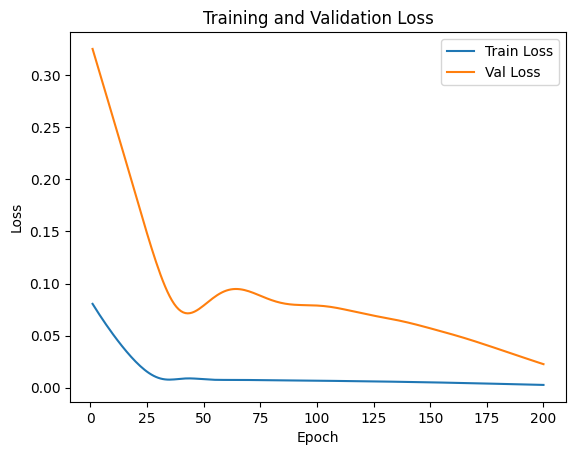

In [ ]:
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Testing model

In [ ]:
model.eval()
with torch.no_grad():
    predictions = []
    targets = []
    for i in range(len(test)):
        outputs = model(X_test)
        predictions.extend(outputs.numpy())
        targets.extend(y_test.numpy())

# Evaluating model by several loss funcions

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(targets, predictions)
mae = mean_absolute_error(targets, predictions)
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')

Mean Squared Error (MSE): 0.0460
Mean Absolute Error (MAE): 0.1905


In [ ]:
predictions = np.array(predictions)
targets = np.array(targets)
mse = mean_squared_error(targets, predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((targets - predictions) / targets)) * 100

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.4f}%')

Mean Squared Error (MSE): 0.0460
Root Mean Squared Error (RMSE): 0.2145
Mean Absolute Percentage Error (MAPE): 28.5726%


## Hyperparameter Tuning and optimization

In [ ]:
import random
import copy
input_size = 1
output_size = 1
search_space = {
    'h_s': [32, 64, 128, 256, 512],
    'num_layers': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'l_r': [0.001, 0.01, 0.1, 1, 10]
}
best_val_loss = float('inf')
best_hyperparameters = None
best_model = None
num_iterations = 10

In [ ]:
for iteration in range(num_iterations):
    hyperparameters = {
        'h_s': random.choice(search_space['h_s']),
        'num_layers': random.choice(search_space['num_layers']),
        'l_r': random.choice(search_space['l_r'])
    }
    model = LSTM(input_size, hyperparameters['h_s'], hyperparameters['num_layers'], output_size)
    optimizer = torch.optim.Adam(model.parameters(), lr=hyperparameters['l_r'])
    for epoch in range(num_epochs):
        model.train()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    model.eval()
    val_outputs = model(X_test)
    val_loss = criterion(val_outputs, y_test)
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_hyperparameters = hyperparameters
        best_model = copy.deepcopy(model)
    print(f'Iteration {iteration+1}/{num_iterations}, Val Loss: {val_loss.item():.4f}, Best Val Loss: {best_val_loss.item():.4f}')

Iteration 1/10, Val Loss: 0.0379, Best Val Loss: 0.0379
Iteration 2/10, Val Loss: 0.2462, Best Val Loss: 0.0379
Iteration 3/10, Val Loss: 0.2559, Best Val Loss: 0.0379
Iteration 4/10, Val Loss: 0.2165, Best Val Loss: 0.0379
Iteration 5/10, Val Loss: 0.0843, Best Val Loss: 0.0379
Iteration 6/10, Val Loss: 0.0487, Best Val Loss: 0.0379
Iteration 7/10, Val Loss: 0.0297, Best Val Loss: 0.0297
Iteration 8/10, Val Loss: 0.2358, Best Val Loss: 0.0297
Iteration 9/10, Val Loss: 0.2621, Best Val Loss: 0.0297
Iteration 10/10, Val Loss: 0.2563, Best Val Loss: 0.0297


# Finding the best validation loss and best hyperparametrs and saving the model

In [ ]:
print("Best Hyperparameters:", best_hyperparameters)

torch.save(best_model.state_dict(), 'best_model.pth')
model = best_model

Best Hyperparameters: {'hidden_size': 128, 'num_layers': 2, 'learning_rate': 0.01}


# Testing model after hypertuning parameters

In [ ]:
model.eval()
with torch.no_grad():
    predictions = []
    targets = []
    for i in range(len(test)):
        outputs = model(X_test)
        predictions.extend(outputs.numpy())
        targets.extend(y_test.numpy())

## Evaluating model by several loss funcions

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(targets, predictions)
mae = mean_absolute_error(targets, predictions)
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')

Mean Squared Error (MSE): 0.0297
Mean Absolute Error (MAE): 0.1374


In [ ]:
predictions = np.array(predictions)
targets = np.array(targets)
mse = mean_squared_error(targets, predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((targets - predictions) / targets)) * 100

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.4f}%')

Mean Squared Error (MSE): 0.0297
Root Mean Squared Error (RMSE): 0.1724
Mean Absolute Percentage Error (MAPE): 19.3270%


# Finding actual vs predicted data

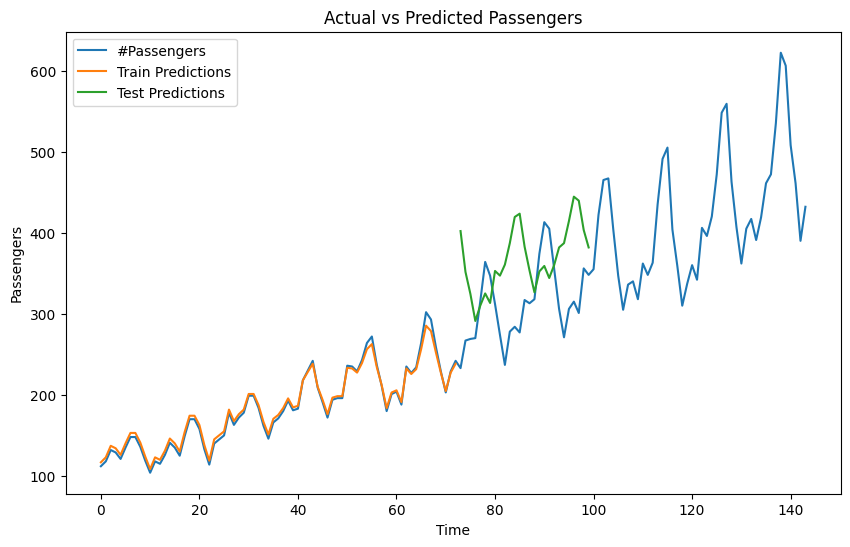

In [ ]:
with torch.no_grad():
    model.eval()
    train_predictions = model(X_train)
    test_predictions = model(X_test)
train_predictions = scaler.inverse_transform(train_predictions.numpy())
test_predictions = scaler.inverse_transform(test_predictions.numpy())
plt.figure(figsize=(10, 6))
plt.plot(d['#Passengers'], label='#Passengers')
plt.plot(range(len(train_predictions)), train_predictions, label='Train Predictions')
plt.plot(range(len(train_predictions), len(train_predictions) + len(test_predictions)), test_predictions, label='Test Predictions')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.title('Actual vs Predicted Passengers')
plt.legend()
plt.show()